In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Dissertation/synthetic_updated_data.csv')

In [7]:
data['Budget'] = data['Transportationcost'] + data['Accommodationcost']
data = data.drop(['Accommodationcost', 'Transportationcost'], axis=1)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Prepare data
X = data.drop(columns=['Destination'])
y = data['Destination']

In [10]:
X.head(10)

,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,7,35.0,Male,American,Hotel,Flight,1800
1,5,28.0,Female,Canadian,Resort,Flight,1300
2,7,45.0,Male,Korean,Villa,Flight,1700
3,14,29.0,Female,British,Hotel,Flight,3000
4,7,26.0,Female,Vietnamese,Airbnb,Train,900
5,5,42.0,Male,American,Hotel,Flight,2300
6,10,33.0,Female,Australian,Hostel,Flight,1700
7,7,25.0,Male,Brazilian,Airbnb,Flight,1500
8,7,31.0,Female,Dutch,Hotel,Train,1400
9,7,39.0,Male,Emirati,Resort,Flight,3300


In [11]:
X = pd.get_dummies(X, columns = ['Travelergender', 'Travelernationality','Accommodationtype','Accommodationtype','Transportationtype'])

In [12]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'values' column
X['Budget'] = scaler.fit_transform(X[['Budget']])
X['Travelerage'] = scaler.fit_transform(X[['Travelerage']])
X['Duration(days)'] = scaler.fit_transform(X[['Duration(days)']])

In [13]:
y = pd.get_dummies(y, columns = ['Destination'])

In [ ]:
y.nunique()

Amsterdam                      2
Amsterdam, Netherlands         2
Athens, Greece                 2
Auckland, New Zealand          2
Australia                      2
Bali                           2
Bali, Indonesia                2
Bangkok                        2
Bangkok, Thai                  2
Bangkok, Thailand              2
Barcelona                      2
Barcelona, Spain               2
Berlin, Germany                2
Brazil                         2
Canada                         2
Cancun, Mexico                 2
Cape Town                      2
Cape Town, SA                  2
Cape Town, South Africa        2
Dubai                          2
Dubai, United Arab Emirates    2
Edinburgh, Scotland            2
Egypt                          2
France                         2
Greece                         2
Hawaii                         2
Honolulu, Hawaii               2
Italy                          2
Japan                          2
London                         2
London, UK

In [ ]:
X.head(10)

,Duration(days),Travelerage,Budget,Travelergender_Female,Travelergender_Male,Travelernationality_American,Travelernationality_Australian,Travelernationality_Brazil,Travelernationality_Brazilian,Travelernationality_British,...,Accommodationtype_Villa,Transportationtype_Airplane,Transportationtype_Bus,Transportationtype_Car,Transportationtype_Car rental,Transportationtype_Ferry,Transportationtype_Flight,Transportationtype_Plane,Transportationtype_Subway,Transportationtype_Train
0,0.272727,0.375,0.150508,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.090909,0.200,0.104340,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.272727,0.625,0.141274,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.909091,0.225,0.261311,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.272727,0.150,0.067405,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.090909,0.550,0.196676,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.545455,0.325,0.141274,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0.272727,0.125,0.122807,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,0.272727,0.275,0.113573,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0.272727,0.475,0.289012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X['Duration(days)'].max()

1.0

In [ ]:
print(y)

       Amsterdam  Amsterdam, Netherlands  Athens, Greece  \
0              0                       0               0   
1              0                       0               0   
2              0                       0               0   
3              0                       0               0   
4              0                       0               0   
...          ...                     ...             ...   
15131          0                       0               0   
15132          0                       0               0   
15133          0                       0               0   
15134          0                       0               0   
15135          0                       0               0   

       Auckland, New Zealand  Australia  Bali  Bali, Indonesia  Bangkok  \
0                          0          0     0                0        0   
1                          0          0     0                0        0   
2                          0          0     0         

In [14]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', use_bias=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(59, activation='softmax')
])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
print(x_train.shape, x_test.shape)

(12108, 71) (3028, 71)


In [18]:
# Train the model
batch_size = 64
epochs = 2000

his = model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1,validation_data = (x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/2000
237/237 [==============================] - 2s 4ms/step - loss: 3.8806 - accuracy: 0.0513 - val_loss: 3.8440 - val_accuracy: 0.0495
Epoch 2/2000
237/237 [==============================] - 1s 4ms/step - loss: 3.8456 - accuracy: 0.0536 - val_loss: 3.8295 - val_accuracy: 0.0578
Epoch 3/2000
237/237 [==============================] - 1s 4ms/step - loss: 3.8369 - accuracy: 0.0554 - val_loss: 3.8186 - val_accuracy: 0.0558
Epoch 4/2000
237/237 [==============================] - 1s 4ms/step - loss: 3.8277 - accuracy: 0.0570 - val_loss: 3.8035 - val_accuracy: 0.0591
Epoch 5/2000
237/237 [==============================] - 1s 4ms/step - loss: 3.8176 - accuracy: 0.0585 - val_loss: 3.7938 - val_accuracy: 0.0657
Epoch 6/2000
237/237 [==============================] - 1s 4ms/step - loss: 3.8065 - accuracy: 0.0589 - val_loss: 3.7749 - val_accuracy: 0.0637
Epoch 7/2000
237/237 [==============================] - 1s 2ms/step - loss: 3.7918 - accuracy: 0.0595 - val_loss: 3.7597 - val_accuracy:

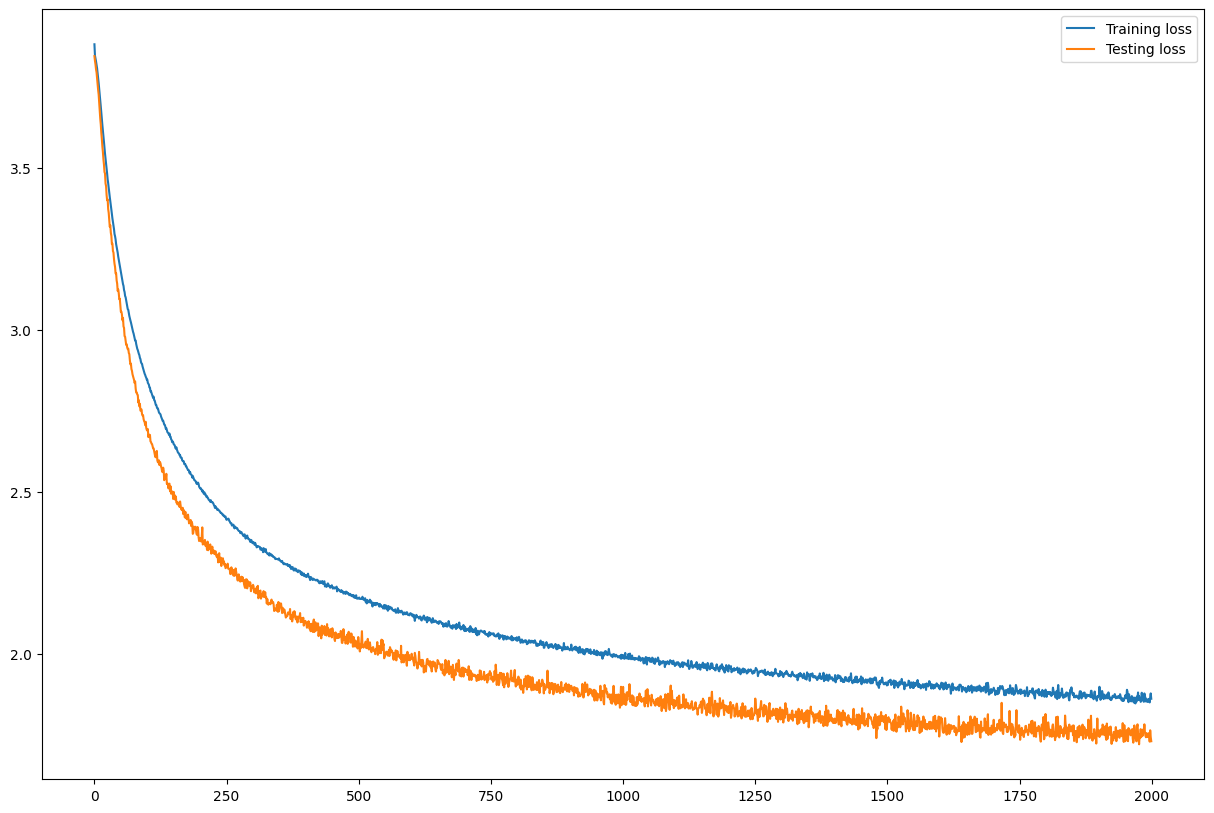

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

plt.plot(his.history['loss'], label='Training loss')
plt.plot(his.history['val_loss'], label='Testing loss')
plt.legend()
plt.show()

In [20]:
plt.plot(his.history['acc'], label='Training accuracy')
plt.plot(his.history['val_acc'], label='Testing accuracy')
plt.legend()
plt.show()

KeyError: ignored

In [21]:
import numpy as np

correct, wrong = 0, 0
preds = model.predict(x_test)
trues = y_test.values
k = 5 # Change to get top-k accuracy

for i in range(len(x_test)):
    pred = preds[i]
    true = trues[i]
    true_idx = np.argsort(true.reshape(-1))[::-1]
    pred_idx = np.argsort(pred.reshape(-1))[::-1]
    if true_idx[0] in pred_idx[:k]:
        correct += 1
    else:
        wrong += 1
print("Top " + str(k) + " Accuracy: ", correct/(correct+wrong))

95/95 [==============================] - 0s 1ms/step
Top 5 Accuracy:  0.7754293262879789


In [25]:
# To get top k location values

example = x_test # Insert example here
out = model.predict(example)
k = 5 # Change k here
top_k_locations = np.argsort(out.reshape(-1))[::-1][:k]

95/95 [==============================] - 0s 2ms/step


In [29]:
top_k_locations.head(1)

AttributeError: ignored

In [26]:
x_test.to_csv("test_set_x.csv")
y_test.to_csv("test_set_y.csv")
x_train.to_csv("train_set_x.csv")
y_train.to_csv("train_set_y.csv")
np.save('test_predictions.npy', preds)

In [24]:
y_train

,Amsterdam,"Amsterdam, Netherlands","Athens, Greece","Auckland, New Zealand",Australia,Bali,"Bali, Indonesia",Bangkok,"Bangkok, Thai","Bangkok, Thailand",...,"Seoul, South Korea",Spain,Sydney,"Sydney, AUS","Sydney, Aus","Sydney, Australia",Thailand,Tokyo,"Tokyo, Japan","Vancouver, Canada"
1094,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14279,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
tf.keras.models.save_model(model, 'saved_model.h5')

In [ ]:
import pickle as pkl

with open('saved_model.pkl', 'wb') as f:
    pkl.dump(model, f)


2023-08-27 22:58:59.334315: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://666a20f0-f4d0-4902-b2e4-ab5cc024ae0d/assets
